In [1]:
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [56]:
from __future__ import print_function
import pandas as pd
import numpy as np
import scipy.special as sp
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import Callback




from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score
from sklearn.model_selection import train_test_split

In [5]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

plt.style.use('fivethirtyeight')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8

colors = ['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c', 
'#137e6d', '#be0119', '#3b638c', '#af6f09', '#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', 
'#810f7c', '#137e6d', '#be0119', '#3b638c', '#af6f09']

cmap = mcolors.LinearSegmentedColormap.from_list("", ["#82cafc", "#069af3", "#0485d1", colors[0], colors[8]])

In [16]:
class my_cb(Callback):
    def __init__(self):
        self.epoch = 0
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        print('.',end='')
        
    def on_epoch_end(self, batch, logs={}):
        self.epoch += 1
        print('\n')
        print("{0:3d} epochs: accuracy={1:5.4f}".format(self.epoch, logs['accuracy']))

In [8]:
# legge i dati in dataframe pandas
data = pd.read_csv("../dataset/ex2data1.txt", header=0, delimiter=',', names=['x1','x2','t'])
# calcola dimensione dei dati
n = len(data)

# calcola dimensionalità delle features
nfeatures = len(data.columns)-1

X = np.array(data[['x1','x2']])
t = np.array(data['t']).reshape(-1,1)

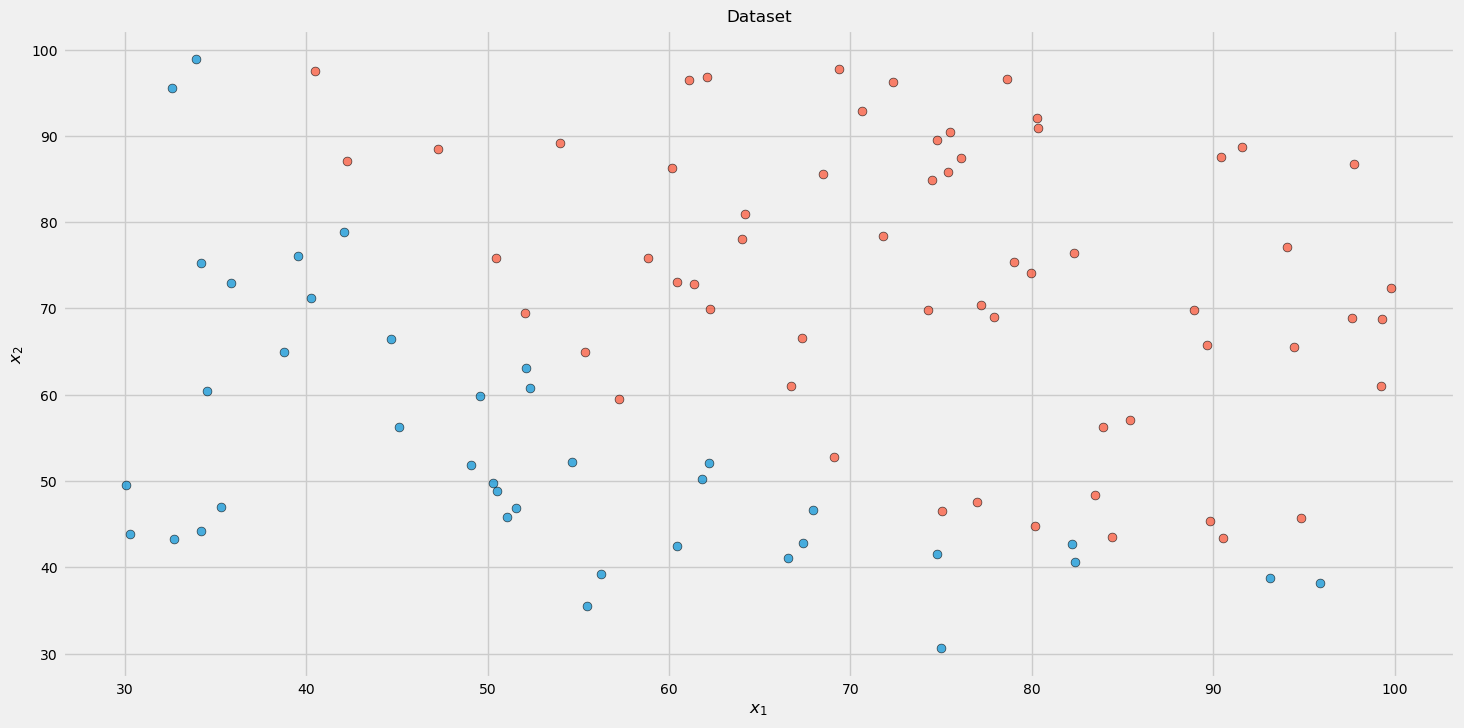

In [9]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
ax.scatter(data[data.t==0].x1, data[data.t==0].x2, s=40, color=colors[0], edgecolor='k', alpha=.7)
ax.scatter(data[data.t==1].x1, data[data.t==1].x2, s=40, color=colors[1], edgecolor='k', alpha=.7)
plt.xlabel('$x_1$', fontsize=12)
plt.ylabel('$x_2$', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Dataset', fontsize=12)
plt.show()

In [10]:
num_classes = np.unique(t).shape[0]

In [11]:
t1 = to_categorical(t, num_classes)

In [100]:
delta1=max(X[:,0])-min(X[:,0])
delta2=max(X[:,1])-min(X[:,1])
min1=min(X[:,0])-delta1/10
max1=max(X[:,0])+delta1/10
min2=min(X[:,1])-delta2/10
max2=max(X[:,1])+delta2/10
u = np.linspace(min1, max1, 200)
v = np.linspace(min2, max2, 200)
u, v = np.meshgrid(u, v)

In [94]:
model0 = Sequential([
    Input(shape=(2,)),
    Dense(8, activation='relu'),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')
])

model0.compile(optimizer=RMSprop(), loss='binary_crossentropy',
              metrics=['accuracy'])


In [95]:
model0.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 8)                 24        
_________________________________________________________________
dense_42 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_43 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 5         
Total params: 137
Trainable params: 137
Non-trainable params: 0
_________________________________________________________________


In [96]:
batch_size = 50
epochs = 3000

history = model0.fit(X, t,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=0, callbacks=[my_cb()])

..

  1 epochs: accuracy=0.4242
..

  2 epochs: accuracy=0.4343
..

  3 epochs: accuracy=0.4343
..

  4 epochs: accuracy=0.4444
..

  5 epochs: accuracy=0.4545
..

  6 epochs: accuracy=0.4242
..

  7 epochs: accuracy=0.4848
..

  8 epochs: accuracy=0.5051
..

  9 epochs: accuracy=0.5051
..

 10 epochs: accuracy=0.5152
..

 11 epochs: accuracy=0.4949
..

 12 epochs: accuracy=0.4848
..

 13 epochs: accuracy=0.5051
..

 14 epochs: accuracy=0.5758
..

 15 epochs: accuracy=0.6162
..

 16 epochs: accuracy=0.6364
..

 17 epochs: accuracy=0.6263
..

 18 epochs: accuracy=0.6162
..

 19 epochs: accuracy=0.6061
..

 20 epochs: accuracy=0.6061
..

 21 epochs: accuracy=0.6061
..

 22 epochs: accuracy=0.6061
..

 23 epochs: accuracy=0.6061
..

 24 epochs: accuracy=0.6061
..

 25 epochs: accuracy=0.6061
..

 26 epochs: accuracy=0.6061
..

 27 epochs: accuracy=0.6061
..

 28 epochs: accuracy=0.6061
..

 29 epochs: accuracy=0.6061
..

 30 epochs: accuracy=0.6061
..

 31 epochs: accuracy=0.6061
..

 32 

In [101]:
z = model0.predict(np.c_[u.ravel(), v.ravel()])

In [102]:
z = z[:,0].reshape(u.shape)

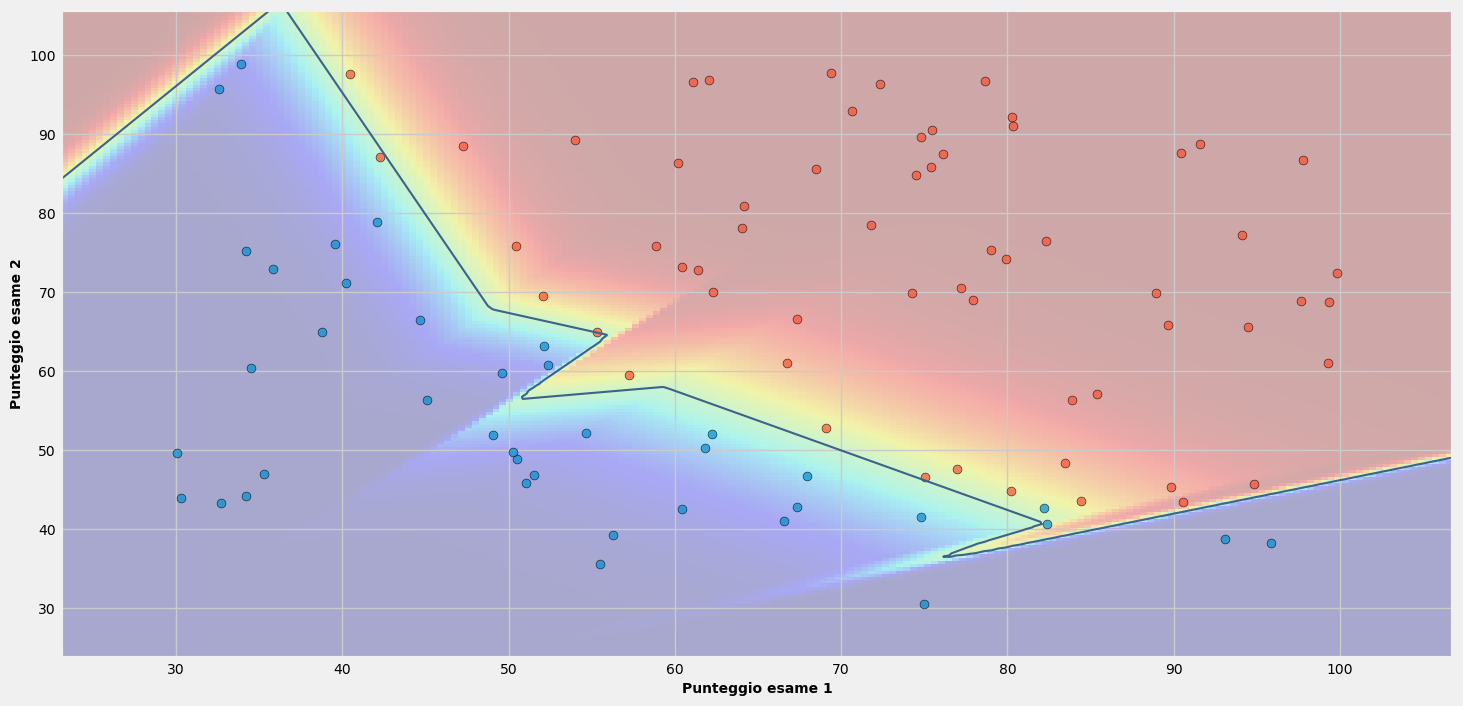

In [103]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
imshow_handle = plt.imshow(z, origin='lower', aspect='auto', extent=(min1, max1, min2, max2), alpha=.3)
ax.scatter(data[data.t==0].x1, data[data.t==0].x2, edgecolor='k', s=40, color=colors[0], alpha=.7)
ax.scatter(data[data.t==1].x1, data[data.t==1].x2, edgecolor='k', s=40, color=colors[1], alpha=.7)
plt.contour(u, v, z, [0.5], colors=[colors[8]], linewidths=[1.5])
plt.xlabel('Punteggio esame 1', fontsize=10)
plt.ylabel('Punteggio esame 2', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(min1, max1)
plt.ylim(min2, max2)
plt.show()

In [82]:
y = model0.predict(X)[:,0]

In [83]:
y = np.where(y>0.5, 1, 0)

In [84]:
cm = confusion_matrix(t,y)
cm

array([[36,  3],
       [ 1, 59]])

In [85]:
pr = precision_recall_fscore_support(t,y)

In [463]:
print('Classe 0: precision={0:5.3f}, recall={1:5.3f}'.format(pr[0][0], pr[1][0]))

print('Classe 1: precision={0:5.3f}, recall={1:5.3f}'.format(pr[1][0], pr[1][1]))

print('Accuracy={0:5.3f}'.format(accuracy_score(t,y)))

Classe 0: precision=0.844, recall=0.974
Classe 1: precision=0.974, recall=0.883
Accuracy=0.919
